In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import env

pd.options.display.max_rows = None
pd.options.display.max_columns = None

In [3]:
url = env.get_db_url('superstore_db')

ssdb = pd.read_sql('''
SELECT *
FROM orders
JOIN categories
USING(`Category ID`)
JOIN customers
USING(`Customer ID`)
JOIN products
USING(`Product ID`)
JOIN regions
USING(`Region ID`)
''', url)

In [4]:
ssdb.to_csv('ssdb.csv')

In [9]:
df = ssdb

In [16]:
df.head()

,Region ID,Product ID,Customer ID,Category ID,Order ID,Order Date,Ship Date,Ship Mode,Segment,Country,City,State,Postal Code,Sales,Quantity,Discount,Profit,Category,Sub-Category,Customer Name,Product Name,Region Name
0,1,FUR-BO-10001798,CG-12520,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,261.9600,2.0,0.00,41.9136,Furniture,Bookcases,Claire Gute,Bush Somerset Collection Bookcase,South
1,1,FUR-CH-10000454,CG-12520,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,Consumer,United States,Henderson,Kentucky,42420.0,731.9400,3.0,0.00,219.5820,Furniture,Chairs,Claire Gute,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",South
2,1,FUR-TA-10000577,SO-20335,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,957.5775,5.0,0.45,-383.0310,Furniture,Tables,Sean O'Donnell,Bretford CR4500 Series Slim Rectangular Table,South
3,1,OFF-ST-10000760,SO-20335,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311.0,22.3680,2.0,0.20,2.5164,Office Supplies,Storage,Sean O'Donnell,Eldon Fold 'N Roll Cart System,South
4,1,OFF-PA-10002365,AA-10480,11,CA-2017-114412,2017-04-15,2017-04-20,Standard Class,Consumer,United States,Concord,North Carolina,28027.0,15.5520,3.0,0.20,5.4432,Office Supplies,Paper,Andrew Allen,Xerox 1967,South


In [17]:
df.shape

(1734, 22)

In [13]:
df.isnull().sum()

Region ID        0
Product ID       0
Customer ID      0
Category ID      0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Sales            0
Quantity         0
Discount         0
Profit           0
Category         0
Sub-Category     0
Customer Name    0
Product Name     0
Region Name      0
dtype: int64

In [14]:
df.describe()

,Region ID,Category ID,Postal Code,Sales,Quantity,Discount,Profit
count,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000,1734.000000
mean,2.722607,8.106113,53501.926182,229.206358,3.794694,0.160110,21.880351
std,1.062277,3.480593,32180.245224,532.862614,2.297407,0.206419,202.891949
min,1.000000,1.000000,1841.000000,1.080000,1.000000,0.000000,-3839.990400
25%,2.000000,6.000000,19143.000000,16.695000,2.000000,0.000000,1.702400
50%,3.000000,8.000000,50315.000000,52.245000,3.000000,0.200000,8.073050
75%,4.000000,11.000000,85705.000000,209.917500,5.000000,0.200000,27.414450
max,4.000000,17.000000,98661.000000,8159.952000,14.000000,0.800000,3177.475000


In [18]:
df.Region

AttributeError: 'DataFrame' object has no attribute 'Region'

<AxesSubplot:>

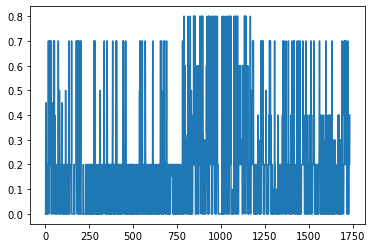

In [21]:
df.Discount.plot()